# VGGNet

## Configuração do ambiente

In [1]:
import time, os, sys, numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torch import optim
from torchsummary import summary

import time, os, sys, numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n = torch.cuda.device_count()
devices_ids= list(range(n))

## Carregamento das bases de dados

A função `load_data_cifar10` carrega e prepara o dataset CIFAR-10 para treinamento e teste.

In [3]:
def load_data_cifar10(batch_size, resize=None):
    root = '/pgeoprj2/ciag2024/dados/cifar/'

    transformer = []
    if resize:
        transformer += [torchvision.transforms.Resize(resize)]
    transformer += [torchvision.transforms.ToTensor()]
    transformer = torchvision.transforms.Compose(transformer)

    cifar10_train = torchvision.datasets.CIFAR10(root=root, train=True, download=True, transform=transformer)
    cifar10_test = torchvision.datasets.CIFAR10(root=root, train=False, download=True, transform=transformer)
    num_workers = 0 if sys.platform.startswith('win32') else 1

    train_iter = torch.utils.data.DataLoader(cifar10_train,
                                            batch_size, shuffle=True,
                                            num_workers=num_workers)

    test_iter = torch.utils.data.DataLoader(cifar10_test,
                                            batch_size, shuffle=False,
                                            num_workers=num_workers)
    return train_iter, test_iter

## Funções auxiliares

* `_get_batch` retorna as features e os labels de um batch

* `evaluate_accuracy` calcula a acurácia de um modelo em um dataset.

* `train_validate` implemneta o treinamento e validação de uma rede.

In [4]:
def _get_batch(batch):
    features, labels = batch

    if labels.type() != features.type():
        labels = labels.type(features.type())

    return (torch.nn.DataParallel(features, device_ids=devices_ids),
            torch.nn.DataParallel(labels, device_ids=devices_ids), features.shape[0])

def evaluate_accuracy(data_iter, net, loss):
    acc_sum, n, l = torch.Tensor([0]), 0, 0
    net.eval()

    with torch.no_grad():
      for X, y in data_iter:
          X, y = X.to(device), y.to(device)
          y_hat = net(X)
          l += loss(y_hat, y).sum()
          acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
          n += y.size()[0]

    return acc_sum.item() / n, l.item() / len(data_iter)

def train_validate(net, train_iter, test_iter, batch_size, trainer, loss, num_epochs):
    print('training on', device)

    for epoch in range(num_epochs):
        net.train()
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()

        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)

            trainer.zero_grad()
            l = loss(y_hat, y).sum()

            l.backward()
            trainer.step()

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.size()[0]

        test_acc, test_loss = evaluate_accuracy(test_iter, net, loss)

        print('epoch %d, train loss %.4f, train acc %.3f, test loss %.4f, '
              'test acc %.3f, time %.1f sec'
              % (epoch + 1, train_l_sum / len(train_iter), train_acc_sum / n, test_loss,
                 test_acc, time.time() - start))

## VGGNet

A VGG Net é uma rede neural convolucional (CNN) desenvolvida pelo Visual Geometry Group da Universidade de Oxford, apresentada no artigo "Very Deep Convolutional Networks for Large-Scale Image Recognition" em 2014. Ela se destacou na competição ILSVRC-2014 (ImageNet Large Scale Visual Recognition Challenge) por sua simplicidade e eficiência.

## Principais Características da VGG Net:

- Profundidade: Diferente de redes anteriores, a VGG introduziu arquiteturas mais profundas, com até 19 camadas de aprendizado (VGG-19).
- Pequenos filtros convolucionais (3×3): Todas as camadas convolucionais usam kernels de tamanho 3×3 (com stride 1), permitindo capturar melhor os padrões complexos das imagens.
- Uso de camadas convolucionais empilhadas: Em vez de filtros grandes (como 5×5 ou 7×7), a VGG usa múltiplas camadas 3×3 empilhadas. Isso aumenta a profundidade sem aumentar muito os parâmetros e melhora a capacidade de aprendizado.
- Camadas de pooling fixas (2×2, stride 2): A cada conjunto de convoluções, uma camada de max pooling reduz a dimensionalidade da imagem, tornando a rede eficiente.
- Totalmente conectada na saída: Após a extração de características, a rede usa camadas totalmente conectadas e uma ativação softmax para classificação.

## Ilustração da arquitetura

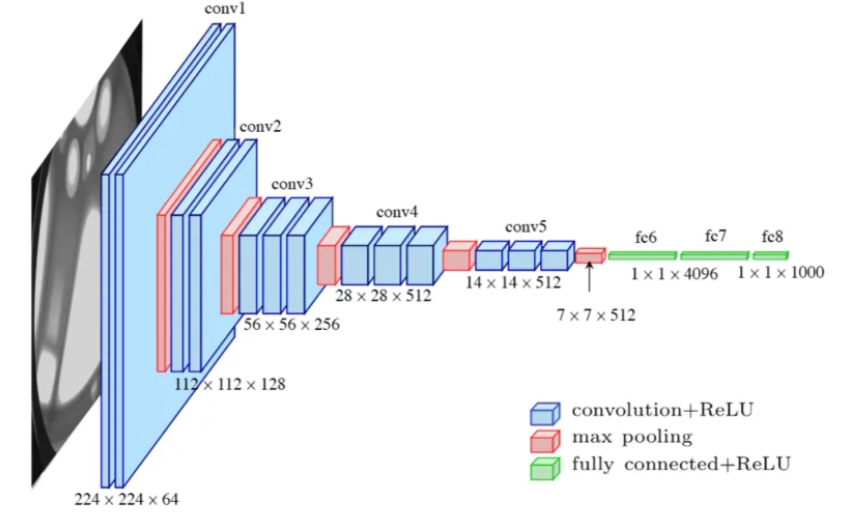

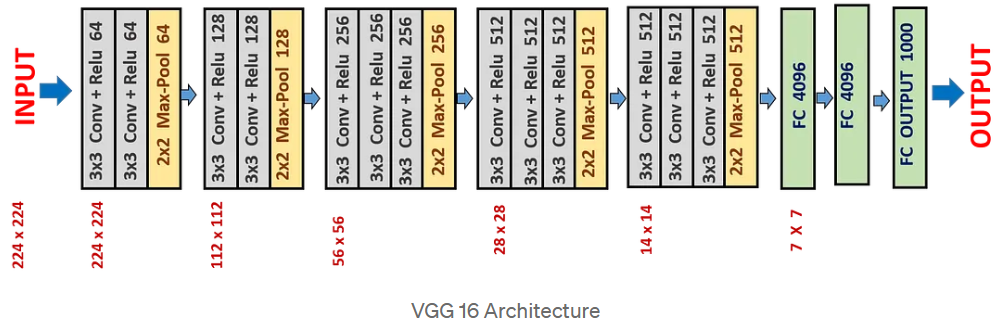

## Número de parâmetros

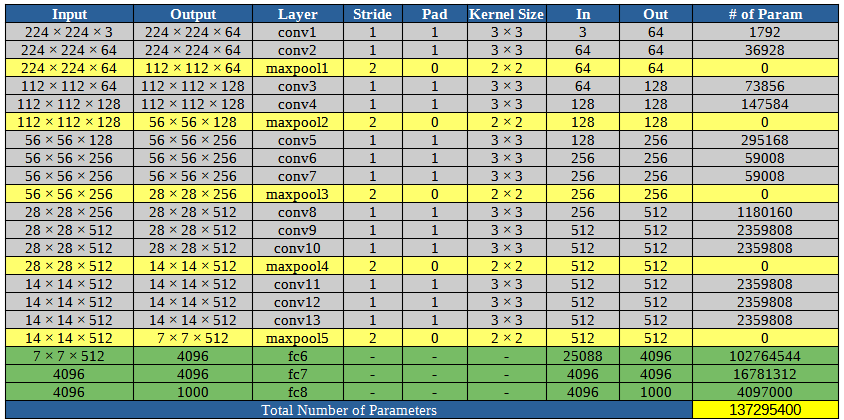


### Modelo direto

In [5]:
class VGG16(nn.Module):
    def __init__(self, input_channels, classes=10, **kwargs):
        super(VGG16, self).__init__(**kwargs)

        self.conv1 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv2 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv4 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv6 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv7 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv8 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv9 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv10 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv11 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv12 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.conv13 = nn.Sequential(
            ## Implemente aqui sua solução
            ## Conv + BatchNorm + RelU
        )
        self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flat = nn.Flatten()


        # Implemente o tamanho do output para a primeira FC do classificador, os tamanhos intermediários e o output final.
        self.fc6 = nn.Sequential(
            nn.Linear(),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc7 = nn.Sequential(
            nn.Linear(),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc8 = nn.Linear()

    def forward(self, x):
        # Implemente o forward da nossa classe, performando as operações na ordem correta.
        
        x = self.conv1(x)
        ...
        out = self.fc8(x)
        
        return out


In [6]:
num_epochs, lr, batch_size, weight_decay = 20, 0.001, 100, 0.0001

net = VGG16(input_channels=3, classes=10).to(device)
print(summary(net,(3,224,224)))

loss = nn.CrossEntropyLoss()

train_iter, test_iter = load_data_cifar10(batch_size, resize=224)

trainer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

train_validate(net, train_iter, test_iter, batch_size, trainer, loss, num_epochs)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

.